<div style='text-align: center;'>
<img src="../images/math60082-banner.png" alt="image" width="80%" height="auto">
</div>

# Lab Class 8
## Solutions


In [1]:
# To get started import some libraries
import numpy
import scipy
import matplotlib.pyplot as plt

In [2]:
# setup the parameters
sigma = 0.4
r = 0.05
X = 2
T = 1
imax = 4
jmax = 4

In [3]:
## calculate the step size and then setup storage for the value
dS = 2*X / jmax
dt = T / imax

S = numpy.zeros(jmax+1)
t = numpy.zeros(imax+1)
vNew = numpy.zeros(jmax+1)
vOld = numpy.zeros(jmax+1)

# calculate the values of S_j and t^i and check they work as expected
for j in range(jmax+1):
    S[j] = j*dS

for i in range(imax+1):
    t[i] = i*dt
    
S,t

(array([0., 1., 2., 3., 4.]), array([0.  , 0.25, 0.5 , 0.75, 1.  ]))

In [4]:
# first enter the value of the option at expiry
for j in range(jmax+1):
    vOld[j] = max( S[j] - X , 0.0 )
    vNew[j] = max( S[j] - X , 0.0 )
    print("t=",t[imax],"S=",S[j],"V(S,t)=",vNew[j])

t= 1.0 S= 0.0 V(S,t)= 0.0
t= 1.0 S= 1.0 V(S,t)= 0.0
t= 1.0 S= 2.0 V(S,t)= 0.0
t= 1.0 S= 3.0 V(S,t)= 1.0
t= 1.0 S= 4.0 V(S,t)= 2.0


In [5]:
# next loop back through time
for i in range(imax-1,-1,-1):
    print("# TIMESTEP #")
    # apply boundary condition at S=0
    vNew[0] = 0.0
    for j in range(1,jmax):
        # input explicit finite difference formula
        A = 0.5*sigma*sigma*j*j*dt + 0.5*r*j*dt
        B = 1.0 - sigma*sigma*j*j*dt
        C = 0.5*sigma*sigma*j*j*dt - 0.5*r*j*dt
        # use vNew[j] for V_j^i and vOld[j] for V_j^{i+1}
        vNew[j] = (A*vOld[j+1] + B*vOld[j] + C*vOld[j-1]) / ( 1 + r*dt)
    # apply boundary condition at S=S_U
    vNew[jmax] = S[jmax] - X*numpy.exp(-r*(T-t[i]))
    
    # set old values equal to new ones
    # MAKE SURE THIS IS DEEP COPY
    vOld = numpy.copy(vNew)
    
    for j in range(jmax+1):
        print("t=",t[i],"S=",S[j],"V(S,t)=",vNew[j])

# TIMESTEP #
t= 0.75 S= 0.0 V(S,t)= 0.0
t= 0.75 S= 1.0 V(S,t)= 0.0
t= 0.75 S= 2.0 V(S,t)= 0.09135802469135804
t= 0.75 S= 3.0 V(S,t)= 1.0246913580246915
t= 0.75 S= 4.0 V(S,t)= 2.0248443990122373
# TIMESTEP #
t= 0.5 S= 0.0 V(S,t)= 0.0
t= 0.5 S= 1.0 V(S,t)= 0.0023685413808870607
t= 0.5 S= 2.0 V(S,t)= 0.1694071025758269
t= 0.5 S= 3.0 V(S,t)= 1.059725209798485
t= 0.5 S= 4.0 V(S,t)= 2.0493801759433348
# TIMESTEP #
t= 0.25 S= 0.0 V(S,t)= 0.0
t= 0.25 S= 1.0 V(S,t)= 0.006637764116806947
t= 0.25 S= 2.0 V(S,t)= 0.23751745640816233
t= 0.25 S= 3.0 V(S,t)= 1.0991163847211065
t= 0.25 S= 4.0 V(S,t)= 2.0736111645583564
# TIMESTEP #
t= 0.0 S= 0.0 V(S,t)= 0.0
t= 0.0 S= 1.0 V(S,t)= 0.012451443736147094
t= 0.0 S= 2.0 V(S,t)= 0.29790713881228953
t= 0.0 S= 3.0 V(S,t)= 1.1396191555785655
t= 0.0 S= 4.0 V(S,t)= 2.097541150998572


In [6]:
def finiteDiff_EuroPut( X,T, r,sigma, SU,imax,jmax):
    ## calculate the step size and then setup storage for the value
    dS = SU / jmax
    dt = T / imax

    S = numpy.zeros(jmax+1)
    t = numpy.zeros(imax+1)
    vNew = numpy.zeros(jmax+1)
    vOld = numpy.zeros(jmax+1)

    # calculate the values of S_j and t^i and check they work as expected
    for j in range(jmax+1):
        S[j] = j*dS

    for i in range(imax+1):
        t[i] = i*dt
        
    # first enter the value of the option at expiry
    for j in range(jmax+1):
        vOld[j] = max( X - S[j] , 0.)
        vNew[j] = max( X - S[j] , 0.)
        
    # next loop back through time
    for i in range(imax-1,-1,-1):
        # apply boundary condition at S=0
        vNew[0] = X * numpy.exp( -r*(T - i*dt))
        for j in range(1,jmax):
            # input explicit finite difference formula
            A = 0.5*sigma*sigma*j*j*dt + 0.5*r*j*dt
            B = 1.0 - sigma*sigma*j*j*dt
            C = 0.5*sigma*sigma*j*j*dt - 0.5*r*j*dt
            # use vNew[j] for V_j^i and vOld[j] for V_j^{i+1}
            vNew[j] = (A*vOld[j+1] + B*vOld[j] + C*vOld[j-1]) / ( 1 + r*dt)
        # apply boundary condition at S=S_U
        vNew[jmax] = 0.0
        
        # set old values equal to new ones
        # MAKE SURE THIS IS A DEEP COPY!
        vOld = numpy.copy(vNew)
    
    return S,vNew
        

In [7]:
S,vNew = finiteDiff_EuroPut(X,T,r , sigma,2.0*X,4,4)
S,vNew


(array([0., 1., 2., 3., 4.]),
 array([1.90245885, 0.91548808, 0.20094574, 0.04252983, 0.        ]))

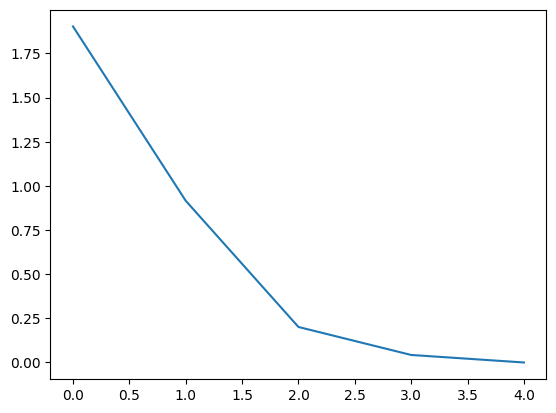

In [8]:
# check a plot to see what it looks like
plt.plot(S,vNew)

In [9]:
# Code such as this will be very slow unless compiled, use numba to speed up
import numba

In [10]:
# create a new super fast compiled version of the function above
finiteDiff_EuroPut_njit = numba.njit(finiteDiff_EuroPut)

In [11]:
# the first time you run the code, it will take some time to compile
# subsuquent calls to the function should be fast
# just check it gives the same results as before
S,vNew = finiteDiff_EuroPut_njit(X,T,r , sigma,2*X,4,4)
S,vNew

(array([0., 1., 2., 3., 4.]),
 array([1.90245885, 0.91548808, 0.20094574, 0.04252983, 0.        ]))

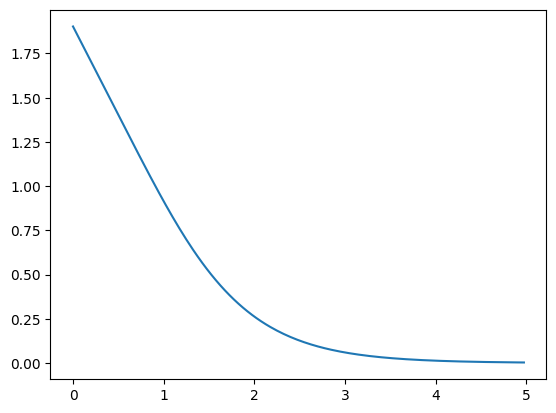

In [17]:
# now run with some bigger values of jmax,
jmax = int(400)
# adjust imax for stability
imax = int(sigma*sigma*jmax*jmax)
# generate results
S,vNew = finiteDiff_EuroPut_njit(X,T,r , sigma,5*X,imax,jmax)
# now plot
plt.plot(S[0:200],vNew[0:200])

# Interpolation

Now look at getting the value at arbitrary  $S$ values in between grid points, we can use linear interpolation:

In [19]:
S0 = 1.9758
print("V(S_0=",S0,",t=0) :=",numpy.interp(S0,S,vNew))

V(S_0= 1.9758 ,t=0) := 0.2720438906435648


Alternatively you could try cubic splines. Later if you try using Richardson extrapolation this could come in handy. Scipy has an easy implementation:

In [20]:
V =  scipy.interpolate.CubicSpline(S,vNew)

Now you can write `V(S0)` or any set of values to get the value of function anywhere on $S\in[0,S_U]$. Note that return function values outside the original domain (extrapolation $S>S_U$) is not recommended.

In [22]:
print("V(S_0=",S0,",t=0) :=",V(S0))

V(S_0= 1.9758 ,t=0) := 0.2720392432139984
